# Семинар по OpenCV | Домашнее задание 1

**Задачи:**

1. Написать свой скрипт, который переводит изображение из формата BGR в RGB.
2. Написать скрипт, который меняет местами луну и голубую воронку на изображении.
3. Превратить "starry_night" в "starry_day" путём увеличения яркости изображения.

**Данные:** изображение `../data/starry_night.jpg`

---

Импорт библиотек:

In [1]:
import numpy as np
import cv2 as cv

from typing import Tuple

import matplotlib.pyplot as plt

Задание пути до изображения:

In [2]:
PATH = '../data/starry_night.jpg'

Чтение изображения:

In [3]:
image = cv.imread(PATH)

Выведение на экран изображения:

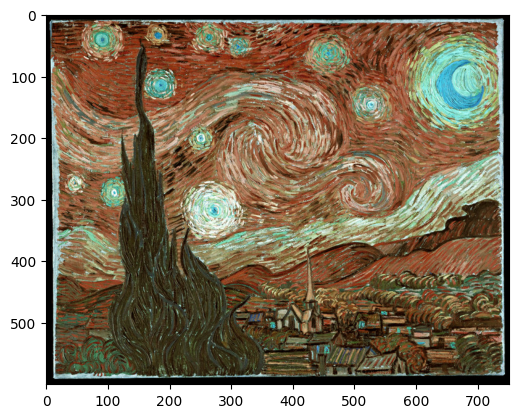

In [4]:
plt.imshow(image)

---

>**Задание 1**
>
>Написать свой скрипт, который переводит изображение из формата BGR в RGB (аналог библиотечной функции ```cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)```). Для проверки используйте изображение starry_night.jpg

Задание функции, выводящей изображение с окраской по каналам:

In [5]:
def plot_image_channels(img: np.ndarray) -> None:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(131)
    plt.imshow(image[:, :, 0], cmap='Blues', vmin=0, vmax=255)
    plt.title('Red Channel')
    
    plt.subplot(132)
    plt.imshow(image[:, :, 1], cmap='Greens', vmin=0, vmax=255)
    plt.title('Green Channel')
    
    plt.subplot(133)
    plt.imshow(image[:, :, 2], cmap='Reds', vmin=0, vmax=255)
    plt.title('Blue Channel')

    plt.show()

Выведение на экран изображения с окраской по каналам:

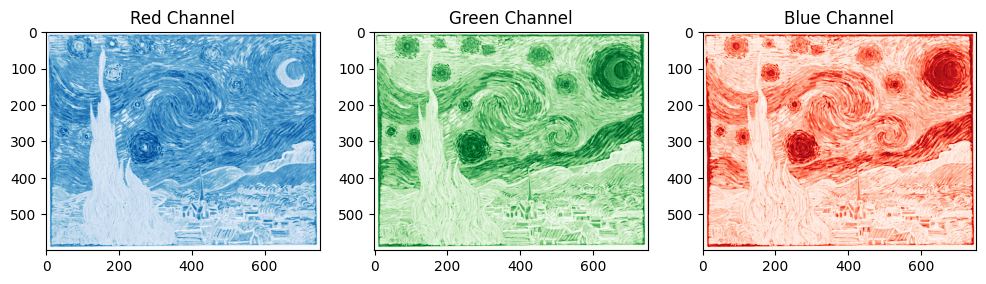

In [6]:
plot_image_channels(image)

Выведение на экран изображения с конвертацией из формата BGR в RGB библиотечной функцией:

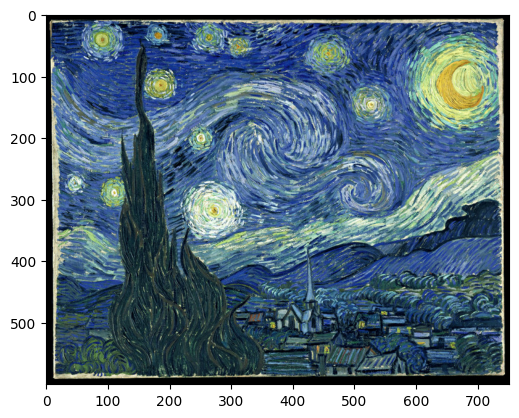

In [7]:
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

<br>

**Способ 1** - Отразить последовательность цветовых каналов.

Отражение последовательности цветовых каналов:

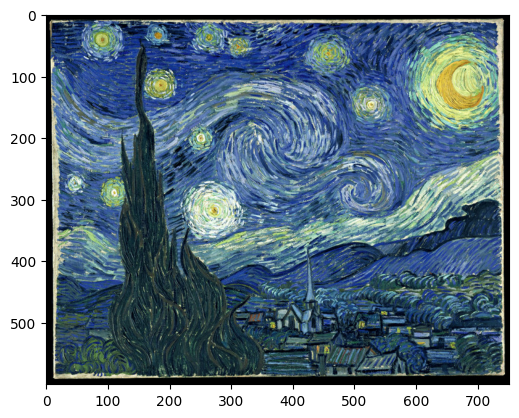

In [8]:
plt.imshow(image[:, :, ::-1])

<br>

**Способ 2** - Поменять порядок последовательности каналов.

Изменение порядка последовательности каналов:

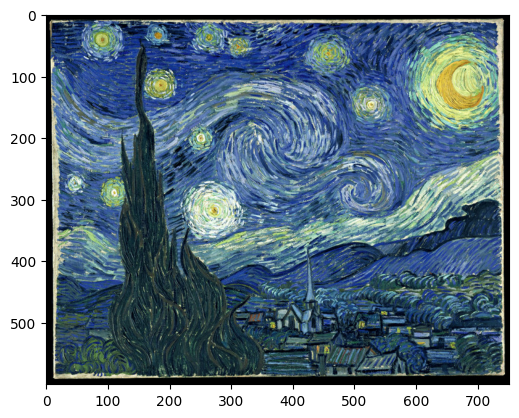

In [9]:
plt.imshow(image[:, :, [2, 1, 0]])

<br>

**Способ 3** - Разделить матрицу изображения на три канала, а затем скомбинировать их в порядке RGB.

Задание функции, получающей каналы изображения и комбинирующей их в порядке RGB:

In [10]:
def convert_bgr_to_rgb(img_bgr: np.ndarray) -> np.ndarray:    
    blue, green, red = [img_bgr[:, :, i] for i in range(3)]
    img_rgb = np.dstack([red, green, blue])

    return img_rgb

Получение каналов изображения и комбинирование их в порядке RGB:

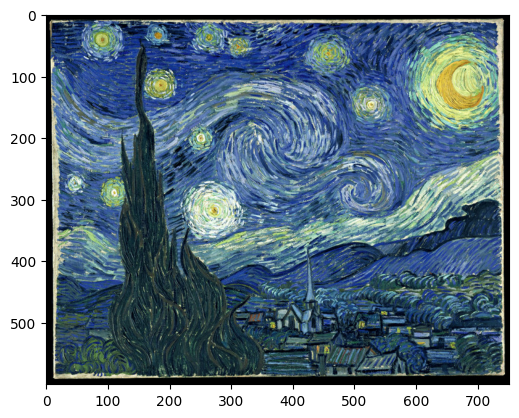

In [11]:
plt.imshow(convert_bgr_to_rgb(image))

---

>**Задание 2**
>
>Написать скрипт, который меняет местами луну и голубую воронку (в самом центре) на изображении starry_night.jpg.

Задание функции, меняющей местами части изображения на изображении по заданным точкам:

In [12]:
def swap_pieces(img: np.ndarray, y_x_start_1: Tuple[int], y_x_start_2: Tuple[int]) -> np.ndarray:
    y_stride = 160
    x_stride = 140
    
    y_1, x_1 = y_x_start_1
    y_2, x_2 = y_x_start_2
    
    img_new = img.copy()
    
    piece_1 = img[y_1:y_1+y_stride, x_1:x_1+x_stride, :]
    piece_2 = img[y_2:y_2+y_stride, x_2:x_2+x_stride, :]
    
    img_new[y_1:y_1+y_stride, x_1:x_1+x_stride, :] = piece_2
    img_new[y_2:y_2+y_stride, x_2:x_2+x_stride, :] = piece_1
    
    fig, ax = plt.subplots(1, 3, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1, 2.5]})
    
    ax[0].imshow(piece_1)
    ax[0].set_title('Piece 1')
    
    ax[1].imshow(piece_2)
    ax[1].set_title('Piece 2')
    
    ax[2].imshow(img_new)
    ax[2].set_title('New image')

Конвертирование изображения из BGR в RGB:

In [13]:
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

Замена луны на воронку и воронки на луну:

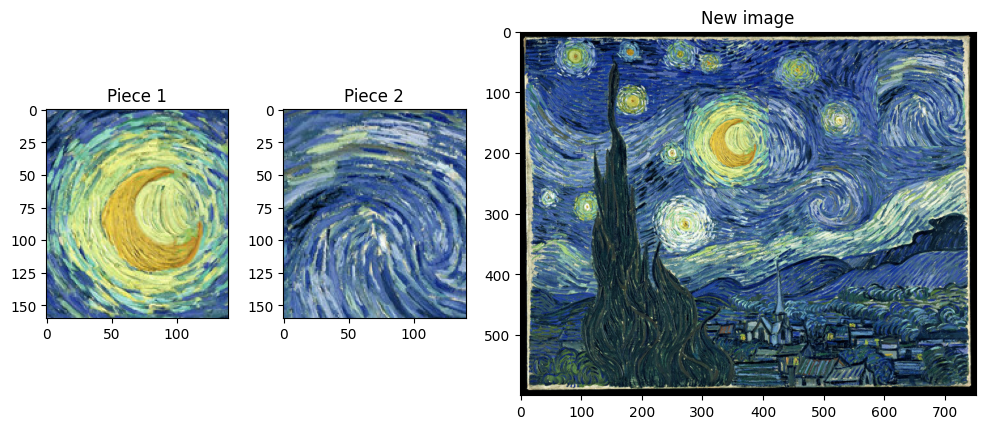

In [14]:
swap_pieces(image, (30, 590), (100, 270))

---

>**Задание 3**
>
>Попробуйте превратить "starry_night" в "starry_day" путем увеличения яркости изображения и смены темно-синих тонов на светло-желтые. Как это сделать? *См. подсказку по смешиванию RGB цветов в файле color_blending.gif.* 
>
>Замечание: при проведении экспериментов с матрицами каналов, обратите внимание на dtype этих матриц (стандартный тип uint8 не позволит вам выйти за границы диапазона 0 .. 255, и поэтому может быть причиной появления не тех результатов, которые вы ожидаете, поэтому перед проведением операций целесообразно этот тип сменить на более подходящий).

Выведение на экран подсказки:

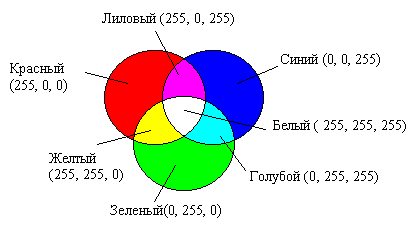

In [15]:
from IPython.display import Image
Image(filename='../data/color_blending.gif')

Выведение на экран типа данных изображения:

In [16]:
image.dtype

dtype('uint8')

Задание функции, выводящей исходное изображение и преобразованного по яркости:

In [17]:
def plot_night_day(img_night: np.ndarray, img_day: np.ndarray) -> None:    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(121)
    plt.imshow(img_night)
    plt.title('Starry night')
    
    plt.subplot(122)
    plt.imshow(img_day)
    plt.title('Starry day')

<br>

**Способ 1** - Использование библиотечной функции.

Преобразование ночи к дню с помощью библиотечной функции:

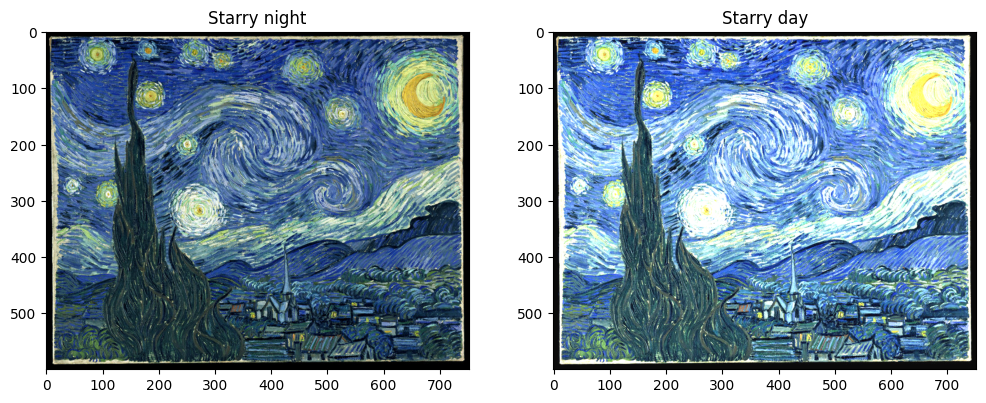

In [18]:
plot_night_day(image, cv.convertScaleAbs(image, alpha=1.5, beta=10))

<br>

**Способ 2** - преобразование всех каналов.

Задание функции преобразования яркости изображения в зависимости от переданных доли яркости и порога яркости ([Image shading with OpenCV and Numpy](https://opendatastoriesottawa.ca/image-shading-with-opencv-and-numpy/)):

In [19]:
convert_colors = np.vectorize(lambda x, frac, threshold: min(255, x + (x * frac)) if x < threshold else x)

Выведение исходного изображения и осветлённого:

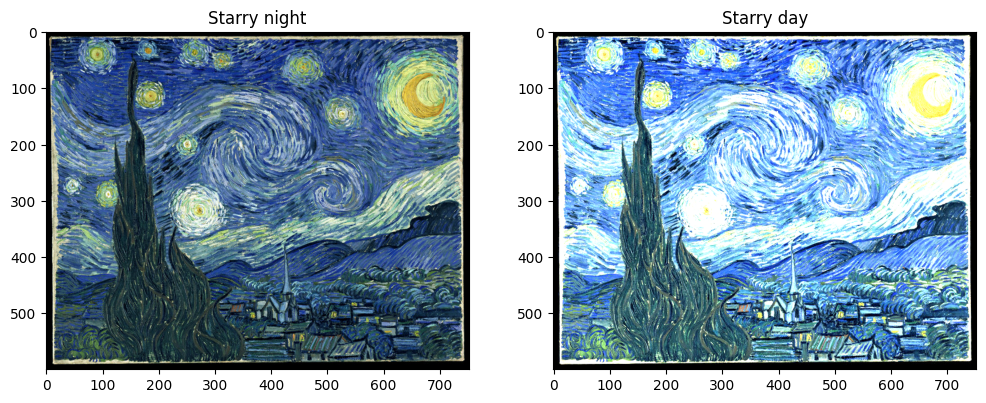

In [20]:
plot_night_day(image, convert_colors(image.astype('float64'), 0.9, 255).astype('uint8'))

<br>

**Способ 3** - преобразование каналов по отдельности.

Задание функции, преобразующей яркость каждого канала по отдельности:

In [21]:
def convert_channels(img: np.ndarray, red: float, green: float, blue: float) -> np.ndarray:
    img_new = img.copy().astype('float64')
    
    img_new[:, :, 0] += red
    img_new[:, :, 1] += green
    img_new[:, :, 2] *= blue
    
    return img_new.astype('uint8')

Выведение исходного изображения и осветлённого:

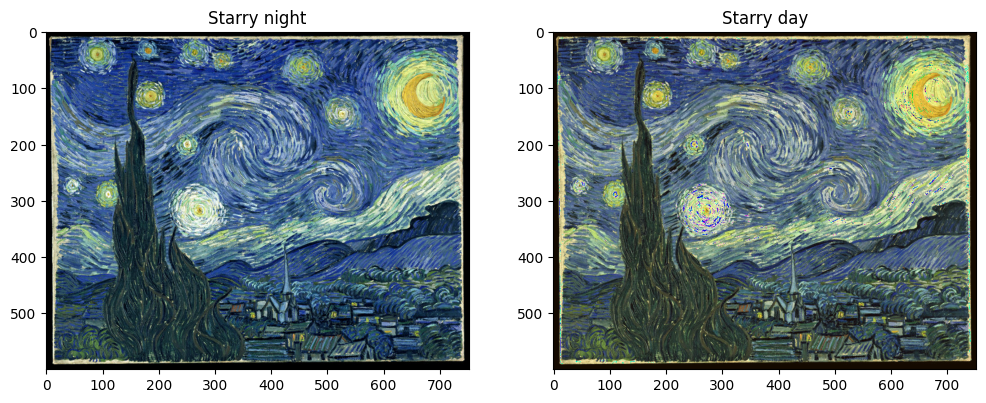

In [22]:
plot_night_day(image, convert_channels(image, 20, 10, 0.9))

<div style="text-align: center; font-size: 20px; padding: 15px 0;">
    <a href="#Семинар-по-OpenCV-|-Домашнее-задание-1" data-toc-modified-id="Наверх" style="text-decoration: none; color: #296eaa; border: 2px dashed #296eaa; opacity: 0.8; border-radius: 3px; padding: 10px 80px;">
        Наверх ↑
    </a>
</div>